In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set a clean style
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

In [10]:
street = pd.read_csv('../data/processed/street_clean.csv')
street['month'] = pd.to_datetime(street['month'])
print(f"{len(street):,} rows loaded")
street.head()

3,416,295 rows loaded


,crime_id,month,longitude,latitude,location,lsoa_code,lsoa_name,crime_type,last_outcome_category,force
0,4a14d4745da0a2219ecf913fdc28a0c84ae8408954cac6...,2023-01-01,-0.106220,51.518275,On or near B500,E01000916,Camden 027B,Other theft,Status update unavailable,city
1,e6e32581c99c5b0f46e5a4d6343e213df349d7069e847d...,2023-01-01,-0.107010,51.521480,On or near Saffron Street,E01000916,Camden 027B,Other crime,Status update unavailable,city
2,7b7cb8e7debe8b0ec1637e7cb1dad832cea4eba16c5f52...,2023-01-01,-0.110350,51.518090,On or near Holborn,E01000917,Camden 027C,Theft from the person,Investigation complete; no suspect identified,city
3,f7fc44e1e76332f0f575b788522329e6f3ce566fd7472d...,2023-01-01,-0.107682,51.517786,On or near B521,E01000917,Camden 027C,Other crime,Status update unavailable,city
4,8083dafd1770af1afca2320c13cbae2420bd2877d9ef29...,2023-01-01,-0.111596,51.518281,On or near Chancery Lane,E01000914,Camden 028B,Other theft,Status update unavailable,city


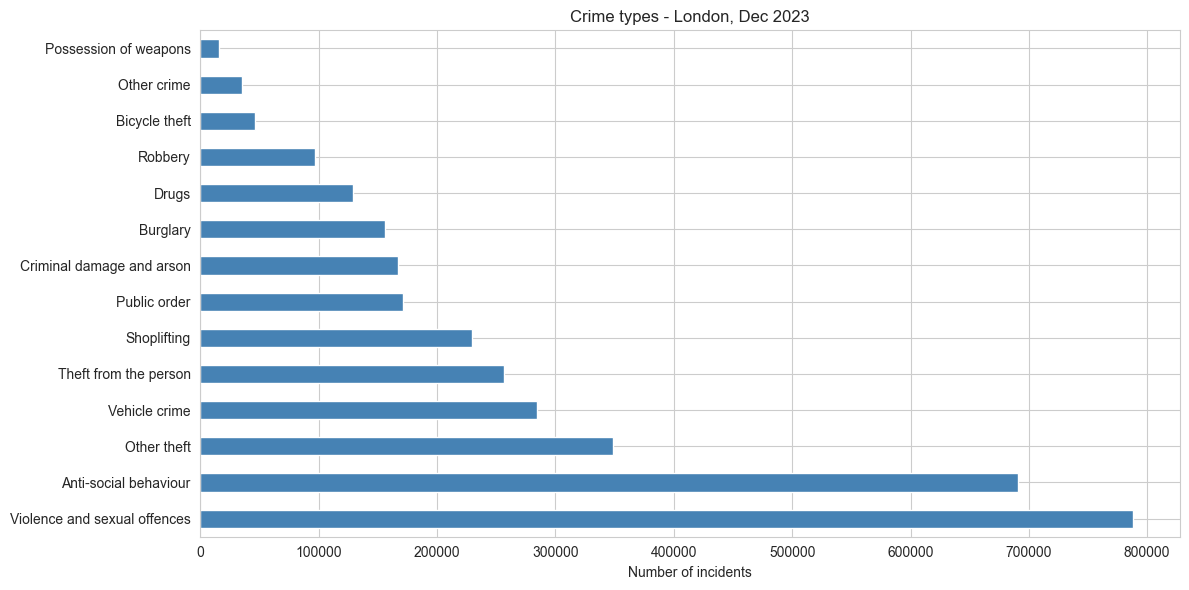

In [11]:
crime_counts = street['crime_type'].value_counts()

fig, ax = plt.subplots()
crime_counts.plot(kind='barh', ax=ax, color='steelblue')
ax.set_title('Crime types - London')
ax.set_xlabel('Number of incidents')
ax.set_ylabel('')
plt.tight_layout()
plt.savefig('../outputs/figures/crime_types.png', dpi=150)
plt.show()

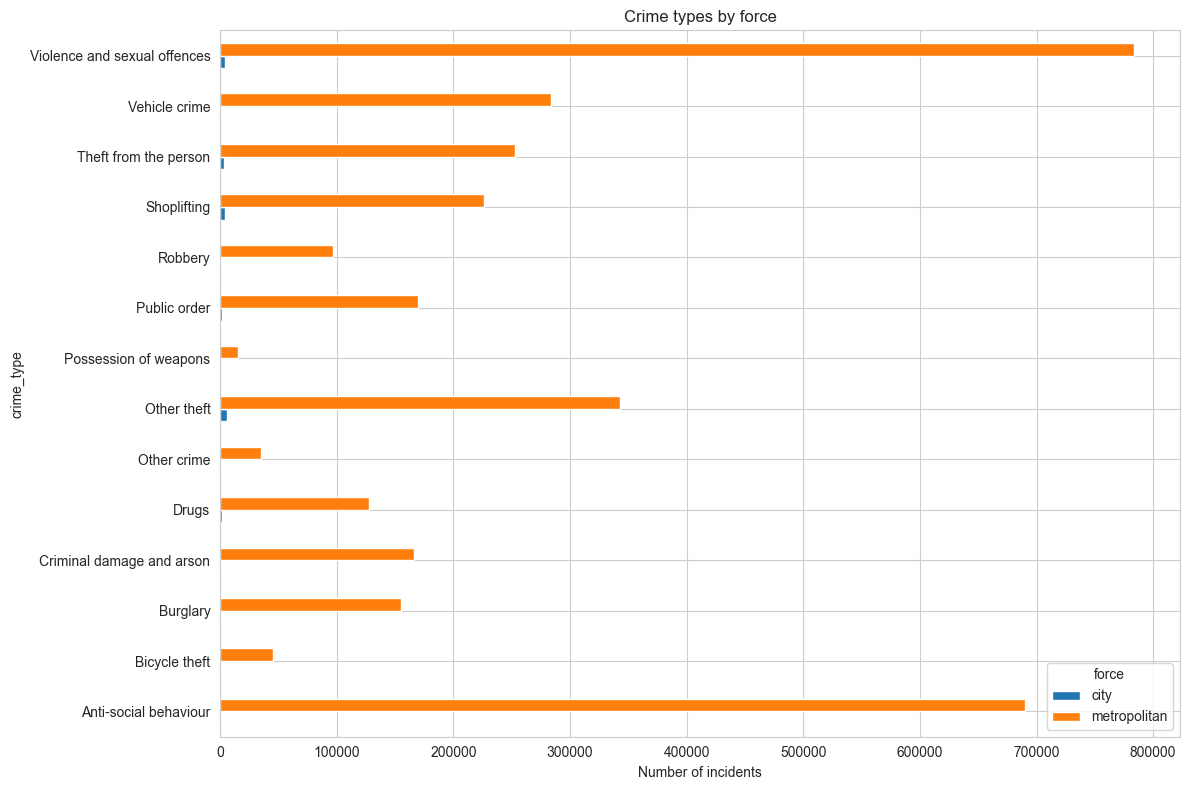

In [12]:
force_crime = street.groupby(['force', 'crime_type']).size().unstack(fill_value=0)

force_crime.T.plot(kind='barh', figsize=(12, 8))
plt.title('Crime types by force')
plt.xlabel('Number of incidents')
plt.tight_layout()
plt.savefig('../outputs/figures/crime_by_force.png', dpi=150)
plt.show()

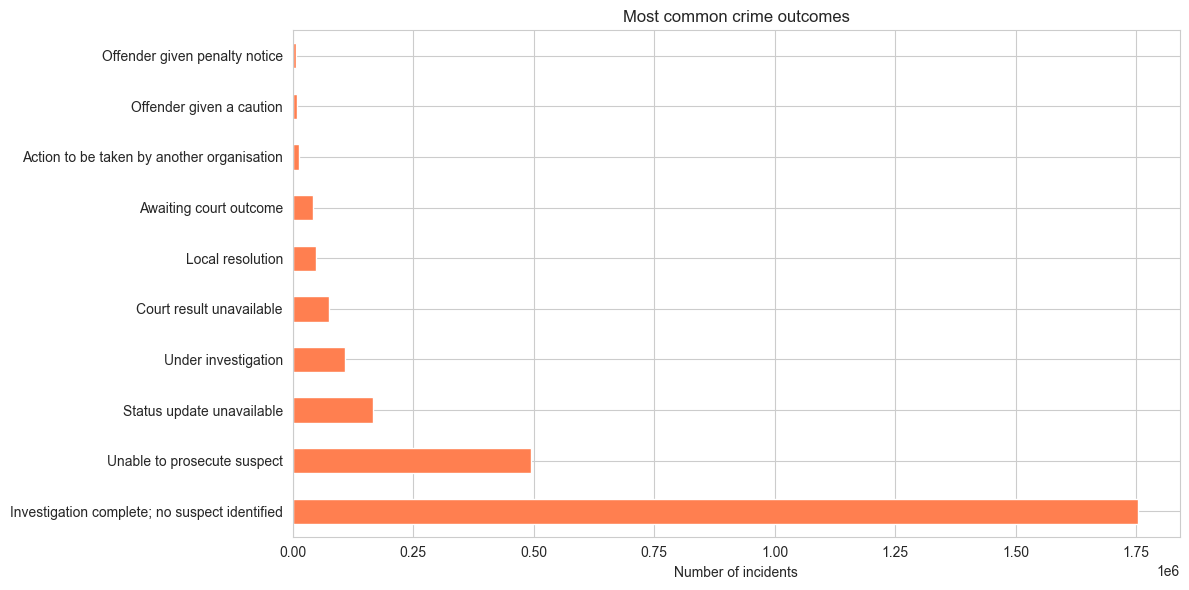

In [13]:
outcome_counts = street['last_outcome_category'].value_counts().head(10)

fig, ax = plt.subplots()
outcome_counts.plot(kind='barh', ax=ax, color='coral')
ax.set_title('Most common crime outcomes')
ax.set_xlabel('Number of incidents')
ax.set_ylabel('')
plt.tight_layout()
plt.savefig('../outputs/figures/outcomes.png', dpi=150)
plt.show()

In [14]:
import subprocess
subprocess.run(['pip', 'install', 'openpyxl'])

CompletedProcess(args=['pip', 'install', 'openpyxl'], returncode=0)

In [15]:
import pandas as pd

xl = pd.ExcelFile('../data/raw/sapelsoasyoa20222024.xlsx')
print(xl.sheet_names)

['Cover sheet', 'Contents', 'Notes', 'Related publications', 'Mid-2022 LSOA 2021', 'Mid-2023 LSOA 2021', 'Mid-2024 LSOA 2021']


In [16]:
pop = pd.read_excel('../data/raw/sapelsoasyoa20222024.xlsx', sheet_name='Mid-2022 LSOA 2021', nrows=5)
print(pop.columns.tolist())
print(pop.head())

['Estimates by single year of age and sex for 2021 Lower layer Super Output Areas, mid-2022', 'Unnamed: 1', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19', 'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23', 'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Unnamed: 28', 'Unnamed: 29', 'Unnamed: 30', 'Unnamed: 31', 'Unnamed: 32', 'Unnamed: 33', 'Unnamed: 34', 'Unnamed: 35', 'Unnamed: 36', 'Unnamed: 37', 'Unnamed: 38', 'Unnamed: 39', 'Unnamed: 40', 'Unnamed: 41', 'Unnamed: 42', 'Unnamed: 43', 'Unnamed: 44', 'Unnamed: 45', 'Unnamed: 46', 'Unnamed: 47', 'Unnamed: 48', 'Unnamed: 49', 'Unnamed: 50', 'Unnamed: 51', 'Unnamed: 52', 'Unnamed: 53', 'Unnamed: 54', 'Unnamed: 55', 'Unnamed: 56', 'Unnamed: 57', 'Unnamed: 58', 'Unnamed: 59', 'Unnamed: 60', 'Unnamed: 61', 

In [17]:
pop = pd.read_excel('../data/raw/sapelsoasyoa20222024.xlsx', 
                    sheet_name='Mid-2022 LSOA 2021', 
                    skiprows=3,  # skip the junk header rows
                    usecols=[2, 3],  # LSOA code and Total
                    header=0)

pop.columns = ['lsoa_code', 'population']
pop = pop.dropna()
print(pop.head())
print(f"{len(pop):,} LSOAs loaded")

   lsoa_code       population
0  E01011949  Hartlepool 009A
1  E01011950  Hartlepool 008A
2  E01011951  Hartlepool 007A
3  E01011952  Hartlepool 002A
4  E01011953  Hartlepool 002B
35,672 LSOAs loaded


In [18]:
pop = pd.read_excel('../data/raw/sapelsoasyoa20222024.xlsx', 
                    sheet_name='Mid-2022 LSOA 2021', 
                    skiprows=3,
                    usecols=[2, 3, 4],  # grab LSOA code, name, and Total (shifting col to right bcus above wasn't picking up correctly)
                    header=0)

pop.columns = ['lsoa_code', 'lsoa_name', 'population']
pop = pop.dropna()
pop['population'] = pd.to_numeric(pop['population'], errors='coerce')
pop = pop.dropna(subset=['population'])
print(pop.head())
print(f"{len(pop):,} LSOAs loaded")

   lsoa_code        lsoa_name  population
0  E01011949  Hartlepool 009A        1876
1  E01011950  Hartlepool 008A        1117
2  E01011951  Hartlepool 007A        1260
3  E01011952  Hartlepool 002A        1635
4  E01011953  Hartlepool 002B        1984
35,672 LSOAs loaded
